In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score, classification_report, auc
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
nm_df = pd.read_csv("../NetworkMeasuresFeatures.csv")

In [3]:
nm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Columns: 105 entries, Actor to Type
dtypes: float64(42), int64(62), object(1)
memory usage: 39.8+ MB


In [4]:
# Change Type as Category
nm_df.Type = nm_df.Type.astype('category')
# Creating a numerical field for Type
nm_df.Type.replace({'Human': 0, 'Bot': 1}, inplace=True)
type_dict = {0 : 'Human', 1: 'Bot'}

In [5]:
y_col = 'Type'

In [6]:
nm_df_orig = nm_df.copy()

In [7]:
# Renaming columns in readable format to understand what each column represents.
col_names = ['Actor', 'A_Acc',
             'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree',
             'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
             'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality',
             'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_ModularityClass', 'PartyPlay_Pagerank',
             'PartyPlay_ComponentId', 'PartyPlay_StrConnId', 'PartyPlay_ClusteringCoefficient', 'PartyPlay_Eigenvector',
             'Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_Degree',
             'Friendship_WeightedDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
             'Friendship_Eccentricity', 'Friendship_ClosenessCentrality', 'Friendship_BetweennessCentrality',
             'Friendship_Authority', 'Friendship_Hub', 'Friendship_ModularityClass', 'Friendship_Pagerank',
             'Friendship_ComponentId', 'Friendship_StrConnId', 'Friendship_ClusteringCoefficient', 'Friendship_Eigenvector',
             'Trade_InDegree', 'Trade_OutDegree', 'Trade_Degree',
             'Trade_WeightedDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
             'Trade_Eccentricity', 'Trade_ClosenessCentrality', 'Trade_BetweennessCentrality',
             'Trade_Authority', 'Trade_Hub', 'Trade_ModularityClass', 'Trade_Pagerank',
             'Trade_ComponentId', 'Trade_StrConnId', 'Trade_ClusteringCoefficient', 'Trade_Eigenvector',
             'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_Degree',
             'Whisper_WeightedDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
             'Whisper_Eccentricity', 'Whisper_ClosenessCentrality', 'Whisper_BetweennessCentrality',
             'Whisper_Authority', 'Whisper_Hub', 'Whisper_ModularityClass', 'Whisper_Pagerank',
             'Whisper_ComponentId', 'Whisper_StrConnId', 'Whisper_ClusteringCoefficient', 'Whisper_Eigenvector',
             'Mail_InDegree', 'Mail_OutDegree', 'Mail_Degree',
             'Mail_WeightedDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
             'Mail_Eccentricity', 'Mail_ClosenessCentrality', 'Mail_BetweennessCentrality',
             'Mail_Authority', 'Mail_Hub', 'Mail_ModularityClass', 'Mail_Pagerank',
             'Mail_ComponentId', 'Mail_StrConnId', 'Mail_ClusteringCoefficient', 'Mail_Eigenvector',
             'Shop_InDegree', 'Shop_OutDegree', 'Shop_Degree',
             'Shop_WeightedDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
             'Shop_Eccentricity', 'Shop_ClosenessCentrality', 'Shop_BetweennessCentrality',
             'Shop_Authority', 'Shop_Hub', 'Shop_ModularityClass', 'Shop_Pagerank',
             'Shop_ComponentId', 'Shop_StrConnId', 'Shop_ClusteringCoefficient', 'Shop_Eigenvector',
             'Type'
            ]
nm_df.columns = col_names
nm_df_orig.columns = col_names

In [8]:
# Standardizing all columns using StandardScaler

X = nm_df[col_names]
X.drop('Type', axis =1)
sc = StandardScaler()
X_std = sc.fit_transform(X)
type(X_std)
nm_df[col_names] = X_std.copy()
#nm_df = X_std.copy()
nm_df['Type'] = nm_df_orig['Type']

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
print(nm_df.loc[1].PartyPlay_Degree)
print(nm_df_orig.loc[1].PartyPlay_Degree)

-0.32429318843903165
17.0


In [10]:
nm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Columns: 105 entries, Actor to Type
dtypes: float64(104), int64(1)
memory usage: 39.8 MB


In [11]:
nm_df_orig.PartyPlay_InDegree.value_counts().sort_index().tail(5)

753    1
757    1
790    1
806    1
876    1
Name: PartyPlay_InDegree, dtype: int64

In [12]:
nm_df.PartyPlay_InDegree.value_counts().sort_values().head(5)

7.510421     1
8.350624     1
6.709298     1
10.226425    1
5.517383     1
Name: PartyPlay_InDegree, dtype: int64

In [14]:
X = nm_df[col_names]
X.drop('Type', axis =1)
y = nm_df['Type']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, random_state=7)
results = []
model_names = []
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
auc_metrics = []
for model_name, model in models:
    print("----------------------------------------- \n")
    print("Running model %s" % model_name)
    model.fit(X_train_3, y_train_3)
    y_predict_3 = model.predict(X_test_3)
    score = model.score(X_test_3, y_test_3)
    print("Model score %s" % score)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test_3, y_predict_3))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test_3, y_predict_3)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test_3, y_predict_3)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test_3, y_predict_3)))
    print("Classification Report: ")
    print(classification_report(y_test_3, y_predict_3, [0, 1]))
    fpr, tpr, threshold = roc_curve(y_test_3, y_predict_3)
    roc_auc = auc(fpr, tpr)
    auc_metrics.append((model_name, fpr, tpr, roc_auc))
    print("AUC : %s \n" % roc_auc)

----------------------------------------- 

Running model LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model score 1.0
Confusion Matrix: 
[[12672     0]
 [    0  2250]]
Overall precision of LR: 1.0
Overall recall of LR: 1.0
Overall F1 Score of LR: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12672
           1       1.00      1.00      1.00      2250

   micro avg       1.00      1.00      1.00     14922
   macro avg       1.00      1.00      1.00     14922
weighted avg       1.00      1.00      1.00     14922

AUC : 1.0 

----------------------------------------- 

Running model LDA


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Model score 0.910802841442166
Confusion Matrix: 
[[12348   324]
 [ 1007  1243]]
Overall precision of LDA: 0.7932354818123803
Overall recall of LDA: 0.5524444444444444
Overall F1 Score of LDA: 0.6512968299711815
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12672
           1       0.79      0.55      0.65      2250

   micro avg       0.91      0.91      0.91     14922
   macro avg       0.86      0.76      0.80     14922
weighted avg       0.90      0.91      0.90     14922

AUC : 0.7634381313131312 

----------------------------------------- 

Running model KNN
Model score 0.9408256265916097
Confusion Matrix: 
[[12511   161]
 [  722  1528]]
Overall precision of KNN: 0.9046773238602723
Overall recall of KNN: 0.6791111111111111
Overall F1 Score of KNN: 0.7758314292967757
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12672
    

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model score 0.9937005763302507
Confusion Matrix: 
[[12665     7]
 [   87  2163]]
Overall precision of SVM: 0.9967741935483871
Overall recall of SVM: 0.9613333333333334
Overall F1 Score of SVM: 0.9787330316742081
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12672
           1       1.00      0.96      0.98      2250

   micro avg       0.99      0.99      0.99     14922
   macro avg       0.99      0.98      0.99     14922
weighted avg       0.99      0.99      0.99     14922

AUC : 0.9803904671717172 



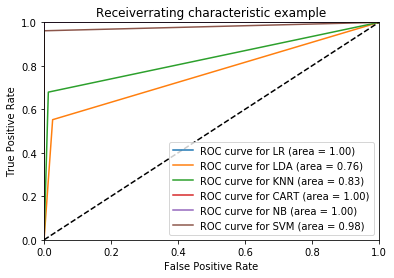

In [15]:
# Plot ROC curve
plt.clf()
for model_name, fpr, tpr, roc_auc in auc_metrics:
    plt.plot(fpr, tpr, label='ROC curve for %s (area = %0.2f)' % (model_name, roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()